# BIMM143 Project 2


## Scientific Question: CPT-CEF treatment is a drug treatment that effectively decreases the viability of cancer cells. Following the CPT-CEF treatment of HT29 colon cancer cells, which pathways are seen upregulated/downregulated leading to the epigenetic modification of HT29 colon cancer cells?


Epigenetic changes to DNA structure regulate gene expression by turning them on or off. An example would be an epigenetic change that downregulates genes involved in DNA repair, leading to an increase levels mutations in DNA, which drives cancer risk. Mutations in genes involved in repair allow damaged and abnormal DNA to replicate and divide,thus allowing cells to bypass cell arrest and apoptosis. These epigenetic modifications increase the likelihood of developing cancer. 


CPT-CEF (Camptothecin-cyclodextrin-EDTA-FE3O4) is an anticancer drug encapsulated in a lipid nanoparticle to increase its solubility and efficiency in delivering the treatment to cancer tissue (Krishnan, Poorani, et al., 2017). CPT-CEF specifically inhibits topoisomerase 1 that induces apoptotic signaling pathway by cleaving DNA, thereby significantly reducing viability of HT29 colon cells with treatment (Farhana et al., 2021). 



The transcriptome data of HT29 colon cancer cells treated and untreated with CPT-CEF was obtained through the NCBI GEO database 
(https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE165875).

According to the NCBI Gene Expression Omnibus (GEO) website, the database is described as the following: "GEO is a public functional genomics data repository supporting MIAME-compliant data submissions. Array- and sequence-based data are accepted. Tools are provided to help users query and download experiments and curated gene expression profiles." 




## Scientific Hypothesis: If the genes involved in DNA repair ( HMGB1, APEX1, and POLE3) are downregulated in HT29 colon cancer cells, then overexpression of these genes should have low p-values and upregulated expression levels in CPT-CEF treated HT29 cells compared, impacting the downstream signalling of apoptosis and significantly inhibiting cancer progression.   

The underlying cause for normal cells becoming cancerous is due to DNA damage and that is left unrepaired. Damage to DNA repair genes that produce the necessary protein tools to repair DNA, which results in the accumulation of mutations in other genes. DNA repair damage has been found in colon cancer, involving these three genes: xHMGB1, APEX1, and POLE3 (Farhana et al., 2021). 

The overexpression of genes involved in DNA repair are responsible for upregulating the apoptotic signaling pathway. The secretion of DNA repair proteins triggers inflammatory reactions that regulates downstream signaling of apoptotic factors to induce apoptosis (Farhana et al., 2021). 

The raw sequences of the control sample (untreated colon cancer cells) and sample treated with CPT-CEF were obtained from NBCI SRA (https://www.ncbi.nlm.nih.gov/Traces/study/?acc=SRP304038&o=acc_s%3Aa). According to the website, this database contains: "Sequence Read Archive (SRA) data, available through multiple cloud providers and NCBI servers, is the largest publicly available repository of high throughput sequencing data. The archive accepts data from all branches of life as well as metagenomic and environmental surveys. SRA stores raw sequencing data and alignment information to enhance reproducibility and facilitate new discoveries through data analysis." To identify conserved gene regions and DNA regions that are damaged vs altered by CPT-CEF, a multiple sequence alignment can be performed since there are two control samples (untreated) and two treatment samples.

BLAST, or Basic Local Alignment Search Tool, is a program that locates similar regions between various sequences. It compares the nucleotides or protein sequences to existing databases and calculates the statistical significance of potential matches. Searches can be done to predict functional differences between sequences or to identify members of gene families.
The nucleotide sequence of HMGB1 gene was downloaded from the NCBI nucleotide (https://www.ncbi.nlm.nih.gov/nuccore/CR456863.1). A pairwise sequence alignment between HMGB1 and BLAST_Hit is performed. Looking at the BLAST search, HMGB1 is a highly conserved protein and present in the nucleus, which makes it a target for cancer. HMGB1 protein regulates transcription by interacting with histones of the chromatin, which ultimately alters its structure. 

The gene expression count matrix of untreated and treated colon cancer cell samples were obtained from NCBI GEO, the p-values will be calculated and visualized using a volcano plot and heatmap.  





## Part 1: Loading Packages


Numpy: This package creates matrices which can be manipulated to perform any operations. Numpy's are typically used for basic statistics (sorting, indexing, sum, mean, standard deviation, variance, etc). To learn more about numpy, see: https://numpy.org/

Pandas: provides framework for general data analysis (specific data structure), based on Numpy. It is similar to a spreadsheet containing rows and columns. To learn more about pandas, see: https://pandas.pydata.org/ 

Scanpy: This package used to analyze differential expression gene data. It is used during an analysis of scRNA-seq data including quality control, clustering of cells and testing for marker genes. To learn more about Scanpy, see: https://pypi.org/project/scanpy/

Scipy: Scipy will be used for p-value calculations. This package is an open source toolkit that performs complex operations such as algebraic functions, various numerical algorithms, etc. compared to Numpy. It is also slower to execute than Numpy. To learn more abnout SciPy, see: https://scipy.org/

Matplotlib: Package used to visualize data using plots, graphs, charts, and many other figures. It allows for easy custom abilities such as creating labels, grids, legends, and many other formatting entities. To learn more about Matplotlib, see: https://matplotlib.org/

Bioinfokit: This package is used to visualize and interpret genomic experiments. Bioinfokit can be used to visualize gene expression analysis via volcano plots, MA plots, heatmaps, clustering analysis, and PCA plots. To learn more about Bioinfokit, see: https://pypi.org/project/bioinfokit/0.3/


In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scanpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
import numpy as np
import csv
import tarfile
import matplotlib.pyplot as plt
import scanpy as sc
%matplotlib inline
#import SeqIO from Biopython
from Bio import SeqIO
from Bio import pairwise2
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import Entrez
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment
from bioinfokit import analys, visuz


## Part 2: Load in the data and perform Bioinformatics Analyses 

In [49]:
# Define the gene based on the txt file downloaded from NCBI
# this is the more advanced way to load in a gene into a jupyter notebook
HMGB1_gene = SeqIO.read("HMGB1.fasta", "fasta")


# Whenever you can, print things in your code to check the data structure and follow your code.
# This will make it easier to understand what you have done in 10 months from now!
# Also make sure to make notes like this!
print(HMGB1_gene)

# Print the length of the gene
print(len(HMGB1_gene))


# Turn our genes into Bio.Seq.Seq data types

# the more advanced option is to use attributes of the GSK3B gene that you loaded in from NCBI
# When you use SeqIO, it will already load the gene in as a specific data time with the attribute .seq that you can
# parse. Again, print to check your work.
HMGB1_gene_seq = HMGB1_gene.seq

print(HMGB1_gene_seq)





ID: CR456863.1
Name: CR456863.1
Description: CR456863.1 Homo sapiens full open reading frame cDNA clone RZPDo834D0816D for gene HMGB1, high-mobility group box 1; complete cds, incl. stopcodon
Number of features: 0
Seq('ATGGGCAAAGGAGATCCTAAGAAGCCGAGAGGCAAAATGTCATCATATGCATTT...TAA')
648
ATGGGCAAAGGAGATCCTAAGAAGCCGAGAGGCAAAATGTCATCATATGCATTTTTTGTGCAAACTTGTCGGGAGGAGCATAAGAAGAAGCACCCAGATGCTTCAGTCAACTTCTCAGAGTTTTCTAAGAAGTGCTCAGAGAGGTGGAAGACCATGTCTGCTAAAGAGAAAGGAAAATTTGAAGATATGGCAAAAGCGGACAAGGCCCGTTATGAAAGAGAAATGAAAACCTATATCCCTCCCAAAGGGGAGACAAAAAAGAAGTTCAAGGATCCCAATGCACCCAAGAGGCCTCCTTCGGCCTTCTTCCTCTTCTGCTCTGAGTATCGCCCAAAAATCAAAGGAGAACATCCTGGCCTGTCCATTGGTGATGTTGCGAAGAAACTGGGAGAGATGTGGAATAACACTGCTGCAGATGACAAGCAGCCTTATGAAAAGAAGGCTGCGAAGCTGAAGGAAAAATACGAAAAGGATATTGCTGCATATCGAGCTAAAGGAAAGCCTGATGCAGCAAAAAAGGGAGTTGTCAAGGCTGAAAAAAGCAAGAAAAAGAAGGAAGAGGAGGAAGATGAGGAAGATGAAGAGGATGAGGAGGAGGAGGAAGATGAAGAAGATGAAGATGAAGAAGAAGATGATGATGATGATTAA


In [51]:
## Run Bio.Blast.NCBIWWW module to run BLAST search over the internet

# Use the result_handle object to write the entire BLAST result to the file 
result_handle = NCBIWWW.qblast("blastn", "nt", HMGB1_gene_seq)
print(result_handle)


In [53]:
# Use the result_handle object to write the entire BLAST result to the file 
# HMGB1_BLASTresults.xml

with open('HMGB1_BLASTresults.xml', 'w') as save_file: 
    blast_results = result_handle.read() 
    save_file.write(blast_results)

In [55]:
handle = open("HMGB1_BLASTresults.xml")
blast_record = NCBIXML.read(handle)

In [58]:
#Loop: For each BLAST hit, print title and e value
##Blast Search and finding all matches to our orignal sequence
for hit in blast_record.descriptions: 
    print(hit.title)
    print(hit.e)

gi|48145842|emb|CR456863.1| Homo sapiens full open reading frame cDNA clone RZPDo834D0816D for gene HMGB1, high-mobility group box 1; complete cds, incl. stopcodon
0.0
gi|926459556|ref|NM_001313893.1| Homo sapiens high mobility group box 1 (HMGB1), transcript variant 1, mRNA
0.0
gi|158256419|dbj|AK291494.1| Homo sapiens cDNA FLJ77690 complete cds, highly similar to Homo sapiens high-mobility group box 1 (HMGB1), mRNA
0.0
gi|18203717|gb|BC021212.1| Homo sapiens dermatopontin, mRNA (cDNA clone IMAGE:4136044), **** WARNING: chimeric clone ****
0.0
gi|21410204|gb|BC030981.1| Homo sapiens high-mobility group box 1, mRNA (cDNA clone MGC:32637 IMAGE:4041682), complete cds
0.0
gi|34528022|dbj|AK122825.1| Homo sapiens cDNA FLJ16428 fis, clone BRACE3008066, highly similar to High mobility group protein B1
0.0
gi|44890725|gb|BC066889.1| Homo sapiens high-mobility group box 1, mRNA (cDNA clone MGC:86954 IMAGE:5268698), complete cds
0.0
gi|45709177|gb|BC067732.1| Homo sapiens high-mobility group bo

In [59]:
Entrez.email = "jmschiffer@ucsd.edu"
handle = Entrez.efetch(db="nucleotide", id="1825824489", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
#print(record)
BLAST_Hit = record.seq
print(BLAST_Hit)

GCGGGCCCGGCCGGCCTCGGCCGGGCGCGGCGGCGGCGGCGGCGGCGGCGGGGGGAGCGGCGCCGCTGCGCTCGCTGGAACATGGCTGACTCGGGCCCGGCGCTGCTGGCTGGAGAGAAAACAAGGCGGGCGGGCGGGGGAGCTGGGCGCAGCAGTTCCGAGAAAAATAACTAAACATGGGCAAAGGAGATCCTAAGAAGCCGAGAGGCAAAATGTCATCATATGCATTTTTTGTGCAAACTTGTCGGGAGGAGCATAAGAAGAAGCACCCAGATGCTTCAGTCAACTTCTCAGAGTTTTCTAAGAAGTGCTCAGAGAGGTGGAAGACCATGTCTGCTAAAGAGAAAGGAAAATTTGAAGATATGGCAAAGGCGGACAAGGCCCGTTATGAAAGAGAAATGAAAACCTATATCCCTCCCAAAGGGGAGACAAAAAAGAAGTTCAAGGATCCCAATGCACCCAAGAGGCCTCCTTCGGCCTTCTTCCTGTTCTGCTCTGAGTATCGCCCAAAAATCAAAGGAGAACATCCTGGCCTGTCCATTGGTGATGTTGCGAAGAAACTGGGAGAGATGTGGAATAACACTGCTGCAGATGACAAGCAGCCTTATGAAAAGAAGGCTGCGAAGCTGAAGGAAAAATACGAAAAGGATATTGCTGCATATCGAGCTAAAGGAAAGCCTGATGCAGCAAAAAAGGGAGTTGTCAAGGCTGAAAAAAGCAAGAAAAAGAAGGAAGAGGAGGAAGATGAGGAAGATGAAGAGGATGAGGAGGAGGAGGAAGATGAAGAAGATGAAGATGAAGAAGAAGATGATGATGATGAATAAGTTGGTTCTAGCGCAGTTTTTTTTTTCTTGTCTATAAAGCATTTAACCCCCCTGTACACAACTCACTCCTTTTAAAGAAAAAAATTGAAATGTAAGGCTGTGTAAGATTTGTTTTTAAACTGTACAGTGTCTTTTTTTGTATAGTTAACACACTACCGAATGTGTCTTTAGATAGC

In [60]:
# Assign sequences to variables 
X = str(HMGB1_gene_seq)
#print(X)
Y = str(BLAST_Hit)
#print(Y)

#Perform local comparison by comparing certain sequences of genome

alignments = pairwise2.align.localxx(X,Y)

#Output provides sequences that align or are similar
for a in alignments:
    print(format_alignment(*a))


 1 A----------TG-G---GC---AA-A-GG---A---G--------------------A-----------------------------T---C-C-----T----A-A---------------G---AA-G-----CC---GA-G---AG-G-CAAAATGTCATCATATGCATTTTTTGTGCAAACTTGTCGGGAGGAGCATAAGAAGAAGCACCCAGATGCTTCAGTCAACTTCTCAGAGTTTTCTAAGAAGTGCTCAGAGAGGTGGAAGACCATGTCTGCTAAAGAGAAAGGAAAATTTGAAGATATGGCAAAAG-CGGACAAGGCCCGTTATGAAAGAGAAATGAAAACCTATATCCCTCCCAAAGGGGAGACAAAAAAGAAGTTCAAGGATCCCAATGCACCCAAGAGGCCTCCTTCGGCCTTCTTCCT---CT--TCTG-----C---------TC-----------T---G--------A--G-T-AT----CG------C-------------------C-C------A-A--A-AA------T-------------C----AA----A-GGA-------GAA----------C---AT--C---CT---GG----CCTG-T-C--CA----------TTG----G--TGA---------------------------------TG-------T--------TG------------------------------------------------------------------C--G---A------------------A----G-A---AAC-----TG----------------------G---------GA---G-A-G-------A---T--GT---------G----G-------------A-A-T-AACAC--T---G-------CT---G----C--------------A---------G--A-T------G------ACA--A-G

In [9]:
# Read in the metadata
metadata=pd.read_csv('SRR_Acc_List.txt',header=0)
metadata=pd.DataFrame({'id':['SRR13593674','SRR13593675','SRR13593676','SRR13593677']})
metadata.head()
# Set the index to the id of the SRA experiment
metadata = metadata.set_index('id')
condition=['control_HT29','control_HT29','cpt-cef_HT29','cpt-cef_HT29']
metadata['condition']=condition
metadata


,condition
id,
SRR13593674,control_HT29
SRR13593675,control_HT29
SRR13593676,cpt-cef_HT29
SRR13593677,cpt-cef_HT29


In [10]:
HT29colon_cell= pd.read_csv('/Users/davinanguyen/Downloads/GSE165875_Processed_gene_abundance_matrix (1).txt', sep='\t', index_col=0) #load gene abundance matrix data and convert txt into csv file
new_cols= metadata.index.copy() #adding samples: untreated1, untreated2, CPT-CEF treated1, CPT-CEF treated2 
HT29colon_cell.columns= new_cols
# HT29colon_cell = HT29colon_cell.drop('id', axis=1)
# HT29colon_cell['ensgene'] = np.arange(HT29colon_cell.shape[0])
#HT29colon_cell.set_index('ensgene', inplace=True)
HT29colon_cell.index.name=('ensgene')
HT29colon_cell #code check
ensgene=HT29colon_cell.index
print(ensgene)
HT29colon_cell = HT29colon_cell.reset_index(level=0)
HT29colon_cell

Index(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000457',
       'ENSG00000000460', 'ENSG00000000971', 'ENSG00000001036',
       'ENSG00000001084', 'ENSG00000001167', 'ENSG00000001460',
       'ENSG00000001461',
       ...
       'ENSG00000286192', 'ENSG00000286219', 'ENSG00000286220',
       'ENSG00000286235', 'ENSG00000286261', 'ENSG00000286264',
       'ENSG00000286905', 'ENSG00000287542', 'ENSG00000287856',
       'ENSG00000288031'],
      dtype='object', name='ensgene', length=12134)


id,ensgene,SRR13593674,SRR13593675,SRR13593676,SRR13593677
0,ENSG00000000003,6.487046,6.592989,6.527473,6.658353
1,ENSG00000000419,6.771244,6.997864,6.911478,7.064510
2,ENSG00000000457,5.468486,5.383951,5.304703,5.384667
3,ENSG00000000460,5.212546,5.314333,5.009005,5.441831
4,ENSG00000000971,7.555522,7.631937,7.080424,7.051920
...,...,...,...,...,...
12129,ENSG00000286264,1.513216,1.455881,1.405338,1.407136
12130,ENSG00000286905,2.546524,2.497792,2.531541,2.499083
12131,ENSG00000287542,3.134947,2.898855,2.888649,2.824127
12132,ENSG00000287856,1.741759,1.757434,1.749290,1.688075


In [11]:
# drop the column with the length column - this would be used for FPKM 
counts_nolen = HT29colon_cell.drop(['ensgene'], axis=1)
# Remove genes without counts across all conditions
genes_without_counts = (counts_nolen != 0).any(axis=1)
# Create a dataframe of the processed counts
counts_processed = HT29colon_cell.loc[genes_without_counts]
print(counts_processed.head())

id          ensgene  SRR13593674  SRR13593675  SRR13593676  SRR13593677
0   ENSG00000000003     6.487046     6.592989     6.527473     6.658353
1   ENSG00000000419     6.771244     6.997864     6.911478     7.064510
2   ENSG00000000457     5.468486     5.383951     5.304703     5.384667
3   ENSG00000000460     5.212546     5.314333     5.009005     5.441831
4   ENSG00000000971     7.555522     7.631937     7.080424     7.051920


In [12]:
# parse the pandas dataframe just for the control experiments and sum up all the control experiments for each gene
Control_exp = list(metadata.loc[metadata['condition'] == 'control_HT29'].index)
print(Control_exp)

# parse the pandas dataframe just for the experiments treated with CPT-CEF
Treatment_exp = list(metadata.loc[metadata['condition'] == 'cpt-cef_HT29'].index)
print(Treatment_exp)

['SRR13593674', 'SRR13593675']
['SRR13593676', 'SRR13593677']


In [14]:
# Return a column to the pandas dataframe that has the sum of the reads for each gene
# under each of the experimental conditions (Sum controls) or (Sum treatment)
counts_processed['Sum Controls'] = counts_processed[Control_exp].sum(axis=1)
counts_processed['Sum Treatment'] = counts_processed[Treatment_exp].sum(axis=1)
print(HT29colon_cell.head())

# Also calculate the mean and standard deviation to calculate the p-value
counts_processed['Mean Controls'] = counts_processed[Control_exp].mean(axis=1)
counts_processed['Mean Treatment'] = counts_processed[Treatment_exp].mean(axis=1)

counts_processed['STD Controls'] = counts_processed[Control_exp].std(axis=1)
counts_processed['STD Treatment'] = counts_processed[Treatment_exp].std(axis=1)

id          ensgene  SRR13593674  SRR13593675  SRR13593676  SRR13593677
0   ENSG00000000003     6.487046     6.592989     6.527473     6.658353
1   ENSG00000000419     6.771244     6.997864     6.911478     7.064510
2   ENSG00000000457     5.468486     5.383951     5.304703     5.384667
3   ENSG00000000460     5.212546     5.314333     5.009005     5.441831
4   ENSG00000000971     7.555522     7.631937     7.080424     7.051920


In [15]:
# # Add a row that has the sum of each column to the counts dataframe
# Sum_Dict = {
#             'SRR13593674': HT29colon_cell['SRR13593674'].sum(),
#             'SRR13593675': HT29colon_cell['SRR13593675'].sum(), 
#             'SRR13593676': HT29colon_cell['SRR13593676'].sum(), 
#             'SRR13593677': HT29colon_cell['SRR13593677'].sum(), 
#             'Sum Controls': HT29colon_cell['Sum Controls'].sum(),
#             'Sum Treatment': HT29colon_cell['Sum Treatment'].sum()}

# HT29colon_cell = HT29colon_cell.append(Sum_Dict,ignore_index=True)
# print(HT29colon_cell)
# print(ensgene)
# # change the index to the gene id
# HT29colon_cell=HT29colon_cell.set_index(ensgene)
# HT29colon_cell


In [16]:
# Add a row that has the sum of each column to the counts dataframe
Sum_Dict = {'ensgene': 'total Column Count',
            'SRR13593674': counts_processed['SRR13593674'].sum(),
            'SRR13593675': counts_processed['SRR13593675'].sum(), 
            'SRR13593676': counts_processed['SRR13593676'].sum(), 
            'SRR13593677': counts_processed['SRR13593677'].sum(), 
            'Sum Controls': counts_processed['Sum Controls'].sum(),
            'Sum Treatment': counts_processed['Sum Treatment'].sum()}

counts_processed = counts_processed.append(Sum_Dict,ignore_index=True)
#print(counts_processed)

# # change the index to the gene id
counts_processed=counts_processed.set_index('ensgene')
counts_processed

,SRR13593674,SRR13593675,SRR13593676,SRR13593677,Sum Controls,Sum Treatment,Mean Controls,Mean Treatment,STD Controls,STD Treatment
ensgene,,,,,,,,,,
ENSG00000000003,6.487046,6.592989,6.527473,6.658353,13.080035,13.185826,6.540018,6.592913,0.074913,0.092546
ENSG00000000419,6.771244,6.997864,6.911478,7.064510,13.769109,13.975988,6.884554,6.987994,0.160245,0.108210
ENSG00000000457,5.468486,5.383951,5.304703,5.384667,10.852438,10.689370,5.426219,5.344685,0.059775,0.056543
ENSG00000000460,5.212546,5.314333,5.009005,5.441831,10.526879,10.450837,5.263440,5.225418,0.071974,0.306054
ENSG00000000971,7.555522,7.631937,7.080424,7.051920,15.187460,14.132344,7.593730,7.066172,0.054034,0.020156
...,...,...,...,...,...,...,...,...,...,...
ENSG00000286905,2.546524,2.497792,2.531541,2.499083,5.044316,5.030624,2.522158,2.515312,0.034459,0.022951
ENSG00000287542,3.134947,2.898855,2.888649,2.824127,6.033801,5.712777,3.016901,2.856388,0.166942,0.045624
ENSG00000287856,1.741759,1.757434,1.749290,1.688075,3.499193,3.437366,1.749596,1.718683,0.011084,0.043285


In [17]:
# Calculate the RPM for the control and the cpt-cef treatment experiment
#RPM does not consider the transcript length normalization
# https://hbctraining.github.io/Training-modules/planning_successful_rnaseq/lessons/sample_level_QC.html
#print(counts_processed.loc['total Column Count']['Sum Controls'])
#print((counts_processed['Sum Controls'] * (10 ** 6)))
#print(counts_processed.loc['total Column Count']['Sum Controls'])


counts_processed['RPM_controls'] = ((counts_processed['Sum Controls'] * (10 ** 6)))/ (counts_processed.loc['total Column Count']['Sum Controls'])
counts_processed['RPM_cpt-cef'] = ((counts_processed['Sum Treatment'] * (10 ** 6)))/ (counts_processed.loc['total Column Count']['Sum Treatment'])
print(counts_processed.head())

                 SRR13593674  SRR13593675  SRR13593676  SRR13593677  \
ensgene                                                               
ENSG00000000003     6.487046     6.592989     6.527473     6.658353   
ENSG00000000419     6.771244     6.997864     6.911478     7.064510   
ENSG00000000457     5.468486     5.383951     5.304703     5.384667   
ENSG00000000460     5.212546     5.314333     5.009005     5.441831   
ENSG00000000971     7.555522     7.631937     7.080424     7.051920   

                 Sum Controls  Sum Treatment  Mean Controls  Mean Treatment  \
ensgene                                                                       
ENSG00000000003     13.080035      13.185826       6.540018        6.592913   
ENSG00000000419     13.769109      13.975988       6.884554        6.987994   
ENSG00000000457     10.852438      10.689370       5.426219        5.344685   
ENSG00000000460     10.526879      10.450837       5.263440        5.225418   
ENSG00000000971     15.18746

In [18]:
# Calculate the Log Fold Change between the two conditions
Fold_change = counts_processed['RPM_cpt-cef']/counts_processed['RPM_controls']
counts_processed['L2F'] = np.log2(Fold_change)
print(counts_processed.head())

                 SRR13593674  SRR13593675  SRR13593676  SRR13593677  \
ensgene                                                               
ENSG00000000003     6.487046     6.592989     6.527473     6.658353   
ENSG00000000419     6.771244     6.997864     6.911478     7.064510   
ENSG00000000457     5.468486     5.383951     5.304703     5.384667   
ENSG00000000460     5.212546     5.314333     5.009005     5.441831   
ENSG00000000971     7.555522     7.631937     7.080424     7.051920   

                 Sum Controls  Sum Treatment  Mean Controls  Mean Treatment  \
ensgene                                                                       
ENSG00000000003     13.080035      13.185826       6.540018        6.592913   
ENSG00000000419     13.769109      13.975988       6.884554        6.987994   
ENSG00000000457     10.852438      10.689370       5.426219        5.344685   
ENSG00000000460     10.526879      10.450837       5.263440        5.225418   
ENSG00000000971     15.18746

In [19]:
from scipy import stats

# Calculate the adjusted p-value
# First calculate p-values for each gene using a lambda function
# https://stackoverflow.com/questions/50137024/calculate-pvalue-from-pandas-dataframe
counts_processed['p-value'] = counts_processed.apply(lambda x: stats.ttest_ind_from_stats(x['Mean Controls'],x['STD Controls'],x['Sum Controls'], x['Mean Treatment'],x['STD Treatment'],x['Sum Treatment'])[1],axis=1)
print(counts_processed.head())

                 SRR13593674  SRR13593675  SRR13593676  SRR13593677  \
ensgene                                                               
ENSG00000000003     6.487046     6.592989     6.527473     6.658353   
ENSG00000000419     6.771244     6.997864     6.911478     7.064510   
ENSG00000000457     5.468486     5.383951     5.304703     5.384667   
ENSG00000000460     5.212546     5.314333     5.009005     5.441831   
ENSG00000000971     7.555522     7.631937     7.080424     7.051920   

                 Sum Controls  Sum Treatment  Mean Controls  Mean Treatment  \
ensgene                                                                       
ENSG00000000003     13.080035      13.185826       6.540018        6.592913   
ENSG00000000419     13.769109      13.975988       6.884554        6.987994   
ENSG00000000457     10.852438      10.689370       5.426219        5.344685   
ENSG00000000460     10.526879      10.450837       5.263440        5.225418   
ENSG00000000971     15.18746

In [20]:
from statsmodels.sandbox.stats.multicomp import multipletests
# https://campus.datacamp.com/courses/practicing-statistics-interview-questions-in-python/statistical-experiments-and-significance-testing?ex=13
pd.set_option('display.float_format', lambda x: '%.20f' % x)
counts_processed['adjusted-p-value'] = multipletests(counts_processed['p-value'], alpha=.05, method='bonferroni')[1]

In [21]:
counts_processed

,SRR13593674,SRR13593675,SRR13593676,SRR13593677,Sum Controls,Sum Treatment,Mean Controls,Mean Treatment,STD Controls,STD Treatment,RPM_controls,RPM_cpt-cef,L2F,p-value,adjusted-p-value
ensgene,,,,,,,,,,,,,,,
ENSG00000000003,6.48704602000000019046,6.59298914200000041319,6.52747306799999993387,6.65835284000000005022,13.08003516200000149183,13.18582590799999998410,6.54001758100000074592,6.59291295399999999205,0.07491309998627386502,0.09254597430134930969,93.72175049273253932824,94.58138871971000583017,0.01317242429318680498,0.12050690865960006493,1.00000000000000000000
ENSG00000000419,6.77124436799999962489,6.99786433500000004670,6.91147782400000032510,7.06451026399999992833,13.76910870300000055977,13.97598808800000114161,6.88455435150000027988,6.98799404400000057080,0.16024451541797191112,0.10821027606552317823,98.65913618634030513022,100.24918964622241901452,0.02306601392237544318,0.05667706808332288737,1.00000000000000000000
ENSG00000000457,5.46848632100000031642,5.38395125100000004892,5.30470273600000030711,5.38466731900000006306,10.85243757199999947716,10.68937005500000125835,5.42621878599999973858,5.34468502750000062917,0.05977532124507966421,0.05654349889405434204,77.76045199907696314767,76.67441322180567908617,-0.02029138414012216299,0.00408902367901741066,1.00000000000000000000
ENSG00000000460,5.21254636499999968180,5.31433274100000030415,5.00900530200000027037,5.44183144399999996210,10.52687910599999909778,10.45083674600000023247,5.26343955299999954889,5.22541837300000011624,0.07197383670200409311,0.30605430008301132139,75.42774349001334144305,74.96342357439648651507,-0.00890842435988982440,0.69916713338936054001,1.00000000000000000000
ENSG00000000971,7.55552238499999972987,7.63193733199999968519,7.08042421399999977183,7.05191962800000027300,15.18745971699999941507,14.13234384200000093301,7.59372985849999970753,7.06617192100000046651,0.05403352720771059658,0.02015578605551477179,108.82197888506716765278,101.37072306027006618478,-0.10232892172063756675,0.00000000000000000000,0.00000000000000000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286905,2.54652382600000004587,2.49779178600000006938,2.53154106800000011646,2.49908309899999991899,5.04431561200000011524,5.03062416700000003544,2.52215780600000005762,2.51531208350000001772,0.03445875594505406342,0.02295124998344288264,36.14379344850107855791,36.08446093263818710284,-0.00237022883596252777,0.72019256436312417691,1.00000000000000000000
ENSG00000287542,3.13494687099999991275,2.89885461200000005277,2.88864932300000010201,2.82412727600000001971,6.03380148299999952144,5.71277659899999967763,3.01690074149999976072,2.85638829949999983882,0.16694243732455060769,0.04562397696973719691,43.23370924531505465893,40.97751236432310406599,-0.07732421304027690956,0.05173801118399301568,1.00000000000000000000
ENSG00000287856,1.74175908100000009782,1.75743384199999996831,1.74929035299999990904,1.68807547800000001814,3.49919292299999984408,3.43736583100000014923,1.74959646149999992204,1.71868291550000007462,0.01108372979657833851,0.04328545322198677769,25.07259972879126408429,24.65608419995985300943,-0.02416790040865320066,0.25239921084177319166,1.00000000000000000000


## Volcano Plot using p-values and fold change

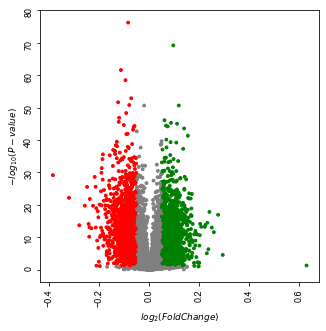

In [45]:
#https://www.reneshbedre.com/blog/volcano.html
#counts_processed=counts_processed.drop(index=['total Column Count'])
counts_processed = counts_processed.iloc[:-1 , :]
visuz.GeneExpression.volcano(df=counts_processed, lfc='L2F', pv='p-value', show=True,lfc_thr=(0.05,0.05),pv_thr=(0.1,0.1))


## Part 4a: Analysis of the volcano plot results

The volcano plot above plots the negative logarithm of p-values (Y-axis) versus the fold change (X-axis) between two conditions: untreated and cpt-cef treated HT29 colon cells. The significant genes found to be upregulated are seen in green. The log fold change threshold was set to 0.05. The statistical signifcance was set to p<0.01. The significant data points (low p-value) are toward the top of the plot while the less significant data points (high p-values) are toward the bottom. The significant genes found to be downregulated are seen in red. 

## Heatmap of Expressed Genes

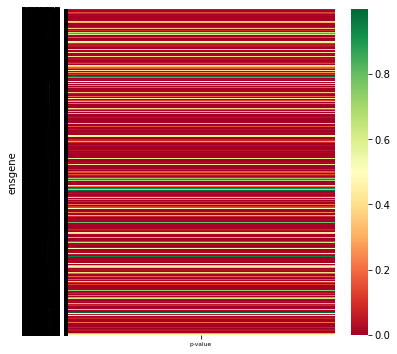

In [39]:
#Create heatmap using p-values from dataframe
selected_columns = counts_processed[["p-value"]]
#Index into desired columns to copy
df = selected_columns.copy()

visuz.gene_exp.hmap(df=df, rowclus=False, colclus=False, cmap='RdYlGn', dim=(6, 6), tickfont=(6, 4),show=True)

## Analysis of Heatmap using p-values

The heatmap above shows which genes are significant according the their p-values. Lower p-values indicate that there is a significant difference in gene expression between untreated and cpt-cef treated HT29 cells. A p-value closer to 1.0 (in color green) has a lower p-value, thus indicating that the genes are more significantly different. A p-value closer to 0 (in color red) has a higher p-value, thus indicating that the genes are less significantly different.

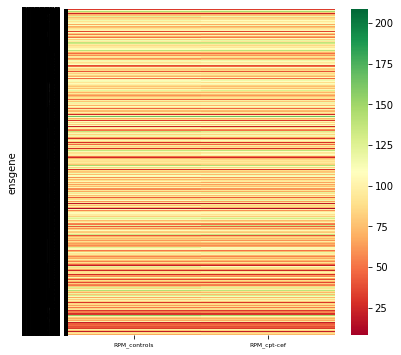

In [47]:
#Create heatmap using p-values from dataframe
selected_columns = counts_processed[["RPM_controls","RPM_cpt-cef"]]
#Index into desired columns to copy
df = selected_columns.copy()

visuz.gene_exp.hmap(df=df, rowclus=False, colclus=False, cmap='RdYlGn', dim=(6, 6), tickfont=(6, 4),show=True)

## Part 4b: Analysis of Heatmap results
The figure above is a heatmap illustrating the upregulation and downregulation of the 12,000+ genes found in HT29 colon cells. RPM (reads per million mapped reads) is the counts per gene multiplied by 1,000,000 then divided by the total number of counts in the sample. The 'RPM_controls' is the normalized counts of the control (untreated) samples. The 'RPM_cpt-cef' is the normalized counts of the treated samples. The heatmap poorly demonstrates the differential gene expressions between the two conditions. I exprected to see 95 upregulated and 146 downregulated gene (Farhana et al., 2021). 

In [48]:
# reorder pandas dataframe from lowest to highest p-values
counts_processed = counts_processed.sort_values(by=['p-value'])
print(counts_processed)
counts_processed.to_csv('CPT-CEF_Colon_Cancer_cells_processedcounts.txt', sep='\t')

                            SRR13593674             SRR13593675  \
ensgene                                                           
ENSG00000167526 10.98630366999999985467 10.99080490999999959456   
ENSG00000138760  9.40226705899999970484  9.39356195499999913068   
ENSG00000197958 10.02149198000000041020 10.03062478999999918017   
ENSG00000005022  9.70723786900000007449  9.71915246700000068358   
ENSG00000132182  8.42836498600000005865  8.42143542500000030770   
...                                 ...                     ...   
ENSG00000130023  4.43006144299999959912  4.30119663600000023962   
ENSG00000135540  5.89939263199999963661  5.63906589299999971843   
ENSG00000275740  3.10188489700000014082  3.37427324200000011700   
ENSG00000127824  6.91885086200000021250  6.97604379299999965980   
ENSG00000132305  7.88000935099999999522  7.98075530599999982684   

                            SRR13593676             SRR13593677  \
ensgene                                                      